<center><img src=img/MScAI_brand.png width=70%></center>

# NetworkX

<img src=img/networkx_logo.svg width=30%>

NetworkX is a nice library of graph algorithms in Python. It can be installed via Anaconda.

https://networkx.github.io/ 

We previously saw several possible representations for graphs which can be used in computer programs:

* Adjacency matrix
* List of edges
* Adjacency lists


The adjacency list format is like this. For each node, we store its list of neighbours:

```python
G = {
    0: [1, 2, 3], 
    1: [0, 3], 
    2: [0], 
    3: [0, 1], 
    4: []
}
```


Next, we'll see that the NetworkX representation is just an extension of this, allowing for each edge to have extra properties such as weights. So, it is a **dict of dicts of dicts**:

In [1]:
G = {
    0: {1: {"w": 0.5}, 2: {"w": 0.1}, 3: {"w": 0.1}},
    1: {0: {"w": 0.5}, 3: {"w": 0.3}},
    2: {0: {"w": 0.1}},
    3: {0: {"w": 0.1}, 1: {"w": 0.3}},
    4: {}
}

One way to make a graph in NetworkX is just to build it up by adding nodes and then edges, as follows. (Later we'll see how to read graphs in from disk.)

In [2]:
import networkx as nx # conventional import
G = nx.Graph()
G.add_nodes_from(range(5))

In [3]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [4]:
G.edges()

EdgeView([])

In [5]:
G.add_edge(0, 1, w=0.5)
G.add_edge(0, 2, w=0.1)
G.add_edge(0, 3, w=0.1)
G.add_edge(1, 3, w=0.3)

In [6]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (1, 3)])

In [7]:
G.edges(data=True)

EdgeDataView([(0, 1, {'w': 0.5}), (0, 2, {'w': 0.1}), (0, 3, {'w': 0.1}), (1, 3, {'w': 0.3})])

And now, notice that `G` itself functions as a `dict`, mapping from a node to its adjacency list **with edge properties**:

In [8]:
for node in G.nodes():
    print(node, ":", G[node])

0 : {1: {'w': 0.5}, 2: {'w': 0.1}, 3: {'w': 0.1}}
1 : {0: {'w': 0.5}, 3: {'w': 0.3}}
2 : {0: {'w': 0.1}}
3 : {0: {'w': 0.1}, 1: {'w': 0.3}}
4 : {}


The nodes don't have to be integers! They can be strings, floats, or arbitrary (hashable) Python objects. 

(Remember mutable objects such as lists are not hashable and cannot be stored in dictionaries.)

* `G = nx.Graph() # default, undirected`
* `G = nx.DiGraph() # directed graph`

### Example: Centrality in Florence

This graph represents the **marriages** between important families in Renaissance Florence (Padgett, figure from Hanneman and Riddle):

<img src=img/PadgettFlorentineMarriages.png width=50%>



Suppose we are given the data in this format (`florentine_families.csv`):

```csv
Acciaiuoli,Medici
Medici,Barbadori
Medici,Ridolfi
Medici,Tornabuoni
Medici,Albizzi
Medici,Salviati
Castellani,Peruzzi
Castellani,Strozzi
Castellani,Barbadori
Peruzzi,Strozzi
Peruzzi,Bischeri
Strozzi,Ridolfi
Strozzi,Bischeri
Ridolfi,Tornabuoni
Tornabuoni,Guadagni
Albizzi,Ginori
Albizzi,Guadagni
Salviati,Pazzi
Bischeri,Guadagni
Guadagni,Lamberteschi
```


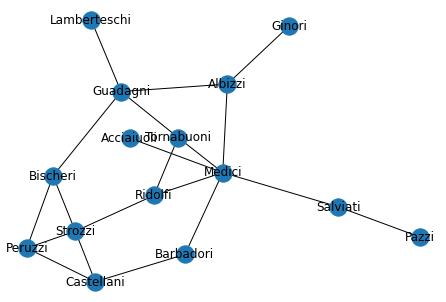

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph() # empty graph, undirected
filename = "data/florentine_families.csv"
f = open(filename)
for line in f:
    n1, n2 = line.strip().split(",") # strip() removes \n
    G.add_edge(n1, n2)
nx.draw_spring(G, with_labels=True)
plt.savefig("florence_nx.pdf")

Let's notice something: **Pucci** has disappeared. The node had no edges, so it wasn't in the `csv` which was in list-of-edges format!


Now, let's use NetworkX to calculate the **importance** of each node. There are several methods, including `degree_centrality`, `betweenness_centrality`, `eigenvector_centrality`. 

In [10]:
def sort_print_dict(d):
    ordering = sorted(d.keys(), key=lambda k: d[k], reverse=True)
    for k in ordering:
        v = d[k]
        print(f"{k} {v:.2f}")

In [12]:
sort_print_dict(nx.degree_centrality(G))

Medici 0.43
Strozzi 0.29
Guadagni 0.29
Ridolfi 0.21
Tornabuoni 0.21
Albizzi 0.21
Castellani 0.21
Peruzzi 0.21
Bischeri 0.21
Barbadori 0.14
Salviati 0.14
Acciaiuoli 0.07
Ginori 0.07
Pazzi 0.07
Lamberteschi 0.07


In [13]:
sort_print_dict(nx.betweenness_centrality(G))

Medici 0.52
Guadagni 0.25
Albizzi 0.21
Salviati 0.14
Ridolfi 0.11
Bischeri 0.10
Strozzi 0.10
Barbadori 0.09
Tornabuoni 0.09
Castellani 0.05
Peruzzi 0.02
Acciaiuoli 0.00
Ginori 0.00
Pazzi 0.00
Lamberteschi 0.00


In [14]:
sort_print_dict(nx.eigenvector_centrality(G))

Medici 0.43
Strozzi 0.36
Ridolfi 0.34
Tornabuoni 0.33
Guadagni 0.29
Bischeri 0.28
Peruzzi 0.28
Castellani 0.26
Albizzi 0.24
Barbadori 0.21
Salviati 0.15
Acciaiuoli 0.13
Lamberteschi 0.09
Ginori 0.07
Pazzi 0.04


* Degree centrality just counts the degree of each node, so higher means *more connections*. Highest is Medici with degree 5.




* Betweenness centrality (you might guess from the name) means to what extent the node is *between* other nodes. Being between other nodes is good because it means you are a power-broker between them. If one wants to contact the other, they go through you. Highest is Medici again: e.g. imagine Albizzi want to contact Barbadori. They could go via Guadagni, Bischeri, Peruzzi, Castellan, and reach Barbadori; or they could via Medici and reach Barbadori. Medici is also the only way into the main graph for e.g. Pazzi and Acciaiuol.




* Eigenvector centrality (you probably would not guess from the name) is the same as PageRank centrality. It says that a node is important if it's connected to many nodes, and each of them is highly important. That is circular, but it works out ok. And again, highest is Medici: they are connected to other important families such as Albizzi. But notice that e.g. Ridolfi do very well here, despite being low in the other metrics, because Ridolfi is connected to important families including Medici and Strozzi.



### Algorithms

* Creating standard graphs and random graphs
* Breadth-first and depth-first traversal
* Topological sort and cycles
* Connectivity
* Diameter
* Cycles
* Shortest paths

### More algorithms

* Centrality e.g. PageRank and related algorithms
* Max-flow/min-cut
* Communities, cliques, clusters, etc.
* Isomorphism (are two graphs the same if we ignore labels)
* Linear algebra methods on adjacency matrices
